# Import des packages

In [4]:
# Import des packages
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# 1 - Scraping du Site 

In [6]:
# Création de la variable contenant l'url de la page web
url = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'

In [7]:
# Récupération du code de la page
page = requests.get(url)
page.encoding = "utf-8"
page

<Response [200]>

In [8]:
# Récupération des données de la page
soup = bs(page.text, features = "html.parser")
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202502121" rel="dns-prefetch"/>
<script>
/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
</script>
<script src="https://cmp.osano.com/16C

In [9]:
# Trouver la table des statistiques
table = soup.find('table', id='per_game_stats')

In [10]:
"""
# Création de la liste vide des valeurs à chercher
data = []

# récup des lignes de la table
rows = table.find('tbody').find_all('tr')
for row in rows: # Isolation d'une ligne parmis les lignes
    cells = row.find_all(['th', 'td']) # Récup toutes les cellules de la ligne isolée
      # Extraire le texte de chaque ligne et l'ajouter à une sous-liste
    row_data = [cell.text for cell in cells]
    for cell in cells: # Isolation des cellules pour extraire la valeur (text) qui s'y trouve
        data.append(row_data)
# Affichage des valeurs de la table
data
"""

"\n# Création de la liste vide des valeurs à chercher\ndata = []\n\n# récup des lignes de la table\nrows = table.find('tbody').find_all('tr')\nfor row in rows: # Isolation d'une ligne parmis les lignes\n    cells = row.find_all(['th', 'td']) # Récup toutes les cellules de la ligne isolée\n      # Extraire le texte de chaque ligne et l'ajouter à une sous-liste\n    row_data = [cell.text for cell in cells]\n    for cell in cells: # Isolation des cellules pour extraire la valeur (text) qui s'y trouve\n        data.append(row_data)\n# Affichage des valeurs de la table\ndata\n"

In [11]:
"""
# Récupération des entêtes de la table
header = [] # liste vide qui contiendra toutes les entêtes

# Récup de toutes les entêtes
headers = table.find('thead').find_all('th')
# Récup des entêtes un à un
for i in headers:
    # Ajout des entêtes récupérer dans la liste vide header
    header.append(i.text)
# Affichage des entêtes
header
"""

"\n# Récupération des entêtes de la table\nheader = [] # liste vide qui contiendra toutes les entêtes\n\n# Récup de toutes les entêtes\nheaders = table.find('thead').find_all('th')\n# Récup des entêtes un à un\nfor i in headers:\n    # Ajout des entêtes récupérer dans la liste vide header\n    header.append(i.text)\n# Affichage des entêtes\nheader\n"

In [12]:
# Création de la liste vide des valeurs à chercher
data = []

# Récupération des lignes de la table
rows = table.find('tbody').find_all('tr')

# Parcourir chaque ligne
for row in rows:
    # Récupérer toutes les cellules de la ligne (th et td)
    cells = row.find_all(['th', 'td'])
    
    # Extraire les valeurs (le texte) de chaque ligne et l'ajouter à une sous-liste
    row_data = [cell.text for cell in cells]
    
    # Ajouter la sous-liste à la liste principale data
    data.append(row_data)

# Affichage des valeurs de la table
print(data[:2])  # Affichage des 2 premières lignes pour vérifier

[['1', 'Stephen Curry', '32', 'GSW', 'PG', '63', '63', '34.2', '10.4', '21.7', '.482', '5.3', '12.7', '.421', '5.1', '9.0', '.569', '.605', '5.7', '6.3', '.916', '0.5', '5.0', '5.5', '5.8', '1.2', '0.1', '3.4', '1.9', '32.0', 'MVP-3,AS,NBA1'], ['2', 'Bradley Beal', '27', 'WAS', 'SG', '60', '60', '35.8', '11.2', '23.0', '.485', '2.2', '6.2', '.349', '9.0', '16.8', '.535', '.532', '6.8', '7.7', '.889', '1.2', '3.5', '4.7', '4.4', '1.2', '0.4', '3.1', '2.3', '31.3', 'AS,NBA3']]


In [13]:
# Récupération des entêtes de la table
header = []

# Récupérer toutes les entêtes
headers = table.find('thead').find_all('th')

# Extraire la valeur (le texte) de chaque entête et l'ajouter à la liste header
header = [i.text for i in headers]

# Affichage des entêtes
print(header)

['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards']


In [14]:
# Création du dataframe df_nba
df_nba = pd.DataFrame(data, columns = header).set_index('Player')
df_nba

,Rk,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,1,32,GSW,PG,63,63,34.2,10.4,21.7,.482,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,"MVP-3,AS,NBA1"
Bradley Beal,2,27,WAS,SG,60,60,35.8,11.2,23.0,.485,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,"AS,NBA3"
Damian Lillard,3,30,POR,PG,67,67,35.8,9.0,19.9,.451,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,"MVP-7,AS,NBA2"
Joel Embiid,4,26,PHI,C,51,51,31.1,9.0,17.6,.513,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,"MVP-2,DPOY-7,AS,NBA2"
Giannis Antetokounmpo,5,26,MIL,PF,61,61,33.0,10.3,18.0,.569,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,"MVP-4,DPOY-5,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Will Magnay,702,22,NOP,C,1,0,3.0,0.0,1.0,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,
Anžejs Pasečņiks,703,25,WAS,C,1,0,6.0,0.0,1.0,.000,...,1.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,0.0,
Noah Vonleh,704,25,BRK,C,4,0,2.8,0.0,0.8,.000,...,0.0,0.3,0.3,0.3,0.0,0.0,0.5,0.5,0.0,


In [15]:
# Suppression de la dernière ligne du df: League Average
df_nba = df_nba.drop('League Average')

# Vérification
df_nba.tail()

,Rk,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Player,,,,,,,,,,,,,,,,,,,,,
Ashton Hagans,701,21,MIN,PG,2,0,2.0,0.0,0.0,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,
Will Magnay,702,22,NOP,C,1,0,3.0,0.0,1.0,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,
Anžejs Pasečņiks,703,25,WAS,C,1,0,6.0,0.0,1.0,.000,...,1.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,0.0,
Noah Vonleh,704,25,BRK,C,4,0,2.8,0.0,0.8,.000,...,0.0,0.3,0.3,0.3,0.0,0.0,0.5,0.5,0.0,
Greg Whittington,705,27,DEN,PF,4,0,3.0,0.0,0.8,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [16]:
# Sauvegarde de la base de données
#df_nba.to_csv('web_scrap_nba_2021_per_game.csv')

# 2 - Analyse des données

### 2-1 Qualité des données

In [19]:
# Affichage du dataframe
display(df_nba)

,Rk,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,1,32,GSW,PG,63,63,34.2,10.4,21.7,.482,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,"MVP-3,AS,NBA1"
Bradley Beal,2,27,WAS,SG,60,60,35.8,11.2,23.0,.485,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,"AS,NBA3"
Damian Lillard,3,30,POR,PG,67,67,35.8,9.0,19.9,.451,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,"MVP-7,AS,NBA2"
Joel Embiid,4,26,PHI,C,51,51,31.1,9.0,17.6,.513,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,"MVP-2,DPOY-7,AS,NBA2"
Giannis Antetokounmpo,5,26,MIL,PF,61,61,33.0,10.3,18.0,.569,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,"MVP-4,DPOY-5,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ashton Hagans,701,21,MIN,PG,2,0,2.0,0.0,0.0,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,
Will Magnay,702,22,NOP,C,1,0,3.0,0.0,1.0,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,
Anžejs Pasečņiks,703,25,WAS,C,1,0,6.0,0.0,1.0,.000,...,1.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,0.0,


#### Traitement des données

In [21]:
# Affichage des infos 
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, Stephen Curry to Greg Whittington
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      705 non-null    object
 1   Age     705 non-null    object
 2   Team    705 non-null    object
 3   Pos     705 non-null    object
 4   G       705 non-null    object
 5   GS      705 non-null    object
 6   MP      705 non-null    object
 7   FG      705 non-null    object
 8   FGA     705 non-null    object
 9   FG%     705 non-null    object
 10  3P      705 non-null    object
 11  3PA     705 non-null    object
 12  3P%     705 non-null    object
 13  2P      705 non-null    object
 14  2PA     705 non-null    object
 15  2P%     705 non-null    object
 16  eFG%    705 non-null    object
 17  FT      705 non-null    object
 18  FTA     705 non-null    object
 19  FT%     705 non-null    object
 20  ORB     705 non-null    object
 21  DRB     705 non-null    object
 22  TRB   

In [22]:
# liste des colonnes
df_nba.columns

Index(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards'],
      dtype='object')

In [23]:
# Vérification des NaNs
df_nba.isnull().sum()

Rk        0
Age       0
Team      0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Awards    0
dtype: int64

In [24]:
# Conversions des variables 

# Liste des int
columns_int = ['Rk', 'Age', 'G', 'GS']

for col in columns_int:
    # Convertir en float pour gérer les NaN, puis convertir en Int64 (gère les NaN)
    df_nba[col] = pd.to_numeric(df_nba[col], errors="coerce").astype("Int64") 

# Liste des float
columns_float = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                 'BLK', 'TOV', 'PF', 'PTS']

for col in columns_float:
    df_nba[col] = pd.to_numeric(df_nba[col], errors="coerce")  # Convertit et remplace les erreurs par NaN
    
# Vérification 
print(df_nba.dtypes)

Rk          Int64
Age         Int64
Team       object
Pos        object
G           Int64
GS          Int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Awards     object
dtype: object


In [25]:
# Statistiques
df_nba.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,705.0,705.0,705.0,705.0,705.000000,705.000000,705.000000,703.000000,705.000000,705.000000,...,676.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.0,25.870922,37.368794,16.941844,19.435887,3.166099,6.944681,0.443486,0.959858,2.714043,...,0.751893,0.805816,2.774043,3.579291,1.933617,0.612199,0.416170,1.073759,1.622979,8.616596
std,203.660256,4.094976,21.26918,21.60376,9.155005,2.278288,4.718210,0.112544,0.877718,2.227645,...,0.146596,0.729362,1.818019,2.384859,1.813998,0.393439,0.408948,0.812583,0.761734,6.272808
min,1.0,19.0,1.0,0.0,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.0,23.0,19.0,0.0,12.500000,1.400000,3.500000,0.397000,0.200000,0.900000,...,0.682750,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,353.0,25.0,37.0,5.0,19.300000,2.600000,5.900000,0.439000,0.700000,2.200000,...,0.775000,0.600000,2.500000,3.100000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,529.0,28.0,57.0,29.0,26.900000,4.300000,9.300000,0.495500,1.500000,4.100000,...,0.845000,1.000000,3.700000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.700000
max,705.0,40.0,72.0,72.0,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


#### Catégorie des variables

In [27]:
# Liste des colonnes dans le data frame
column_names = df_nba.columns
column_names

Index(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards'],
      dtype='object')

In [28]:
# Nombre de varianbles
print(len(column_names), "variables")

30 variables


In [29]:
# Liste des variables catégorielles
var_cat = []
for col in column_names:
    if df_nba[col].dtypes == "object" or df_nba[col].dtypes == "str":
       var_cat.append(col)
print("La liste des variables catégorielles: ", var_cat)

La liste des variables catégorielles:  ['Team', 'Pos', 'Awards']


In [30]:
# Trouver les signification des entêtes
# Trouver tous les <th> (colonnes du tableau)
for th_element in headers: # headers = table.find('thead').find_all('th')

    # Extraire tous les attributs aria-label et data-tip
    entete = th_element.get("aria-label")
    definition = th_element.get("data-tip")

    # Affichage des entêtes et leur définitions
    print(f"{entete} : {definition}")

Rk : Rank
Player : None
Age : Player's age on February 1 of the season
Team : None
Pos : Position
G : Games
GS : Games Started
MP : Minutes Played
FG : Field Goals
FGA : Field Goal Attempts
FG% : Field Goal Percentage
3P : 3-Point Field Goals
3PA : 3-Point Field Goal Attempts
3P% : 3-Point Field Goal Percentage
2P : 2-Point Field Goals
2PA : 2-Point Field Goal Attempts
2P% : 2-Point Field Goal Percentage
eFG% : <strong>Effective Field Goal Percentage</strong><br>This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
FT : Free Throws
FTA : Free Throw Attempts
FT% : Free Throw Percentage
ORB : Offensive Rebounds
DRB : Defensive Rebounds
TRB : Total Rebounds
AST : Assists
STL : Steals
BLK : Blocks
TOV : Turnovers
PF : Personal Fouls
PTS : Points
Awards : None


#### Distribution des données

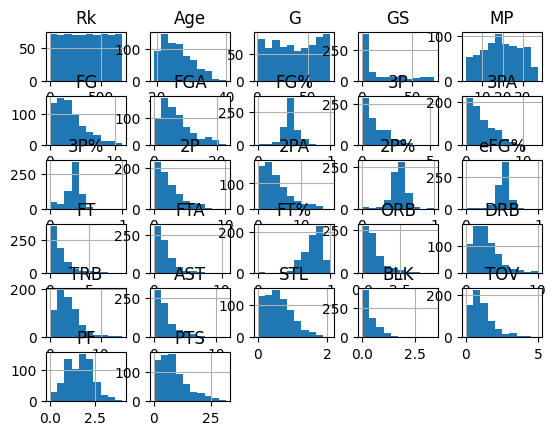

In [32]:
# Visualisation rapide
df_nba.hist();

### 2-2 Meilleurs marqueurs

In [34]:
df_nba.head()

,Rk,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,1,32,GSW,PG,63,63,34.2,10.4,21.7,0.482,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,"MVP-3,AS,NBA1"
Bradley Beal,2,27,WAS,SG,60,60,35.8,11.2,23.0,0.485,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,"AS,NBA3"
Damian Lillard,3,30,POR,PG,67,67,35.8,9.0,19.9,0.451,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,"MVP-7,AS,NBA2"
Joel Embiid,4,26,PHI,C,51,51,31.1,9.0,17.6,0.513,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,"MVP-2,DPOY-7,AS,NBA2"
Giannis Antetokounmpo,5,26,MIL,PF,61,61,33.0,10.3,18.0,0.569,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,"MVP-4,DPOY-5,AS,NBA1"


In [35]:
# Top 10 des marqueurs per game
top_scorers = df_nba.sort_values(by="PTS", ascending=False).head(10)
# Affiche les infos principales
print("Top 10 des meilleurs scorers per game:")
print(top_scorers[["PTS", "Team", "Age", "Pos"]]) 

Top 10 des meilleurs scorers per game:
                        PTS Team  Age Pos
Player                                   
Stephen Curry          32.0  GSW   32  PG
Bradley Beal           31.3  WAS   27  SG
Damian Lillard         28.8  POR   30  PG
Joel Embiid            28.5  PHI   26   C
Giannis Antetokounmpo  28.1  MIL   26  PF
Luka Dončić            27.7  DAL   21  PG
Zach LaVine            27.4  CHI   25  SG
Zion Williamson        27.0  NOP   20  PF
Kevin Durant           26.9  BRK   32  PF
Kyrie Irving           26.9  BRK   28  PG


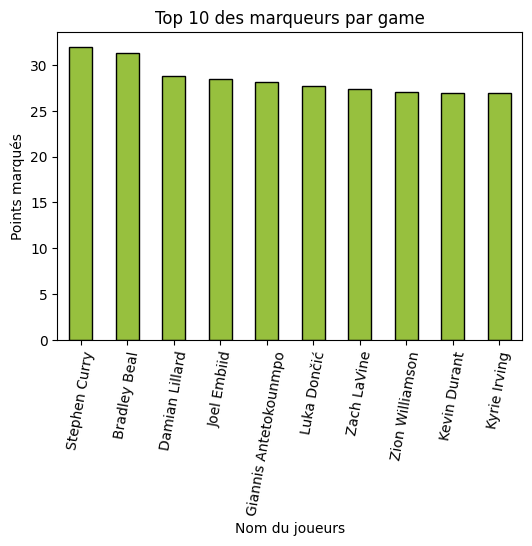

In [36]:
plt.figure(figsize=(6, 4))
top_scorers["PTS"].plot(kind='bar', color='#97c03e', edgecolor='black')
plt.title('Top 10 des marqueurs par game')
plt.xlabel('Nom du joueurs')
plt.ylabel('Points marqués')
plt.xticks(rotation=80)
plt.show();

### 2-3 Distribution des points par match

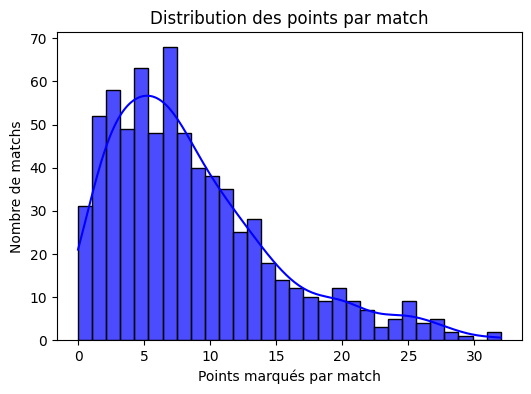

In [38]:
# Distribution des points par match
plt.figure(figsize=(6, 4))
sns.histplot(df_nba['PTS'], bins=30, kde=True, color='blue', alpha=0.7)
plt.xlabel('Points marqués par match')
plt.ylabel('Nombre de matchs')
plt.title('Distribution des points par match')
plt.show()

### 2-4 Joueurs les plus polyvalents

##### 2-4-1 Joueurs équilibrés

In [41]:
# Joueurs équilibrés
    # def: un joueur est équilibré s'il a plusieurs bon stats
    # choix des stats: ['PTS', 'TRB', 'AST', 'STL', 'BLK']
    # normalisation des stats avec MinMaxScaler pour comparer la polyvalence des joueurs

In [74]:
# Import du MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Sélection des stats importantes
stats_polyvalence = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Création d'une copie du DataFrame
df_nba_poly = df_nba.copy()

# Vérifier si "Player" est un index. Si oui on le remet en colonne
if 'Player' not in df_nba_poly.columns:
    df_nba_poly.reset_index(inplace=True)

# Suppression des doublons en agrégeant les statistiques par joueur (moyenne)
df_nba_poly = df_nba_poly.groupby("Player", as_index=False).mean(numeric_only=True)

# Vérifier si "Player" a disparu après groupby et le remettre si besoin
#if 'Player' not in df_nba_poly.columns:
#    df_nba_poly.reset_index(inplace=True)

# Normalisation des valeurs entre 0 et 1
scaler_poly = MinMaxScaler()
df_nba_poly[stats_polyvalence] = scaler_poly.fit_transform(df_nba_poly[stats_polyvalence])

# Calcul d'un score de polyvalence (moyenne des stats normalisées)
df_nba_poly['Polyvalence_Score'] = df_nba_poly[stats_polyvalence].mean(axis=1)

# Trier les joueurs les plus polyvalents et éviter les doublons
top_polyvalents = df_nba_poly.sort_values(by='Polyvalence_Score', ascending=False).drop_duplicates(subset=['Player']).head(10)

# Affichage
display(top_polyvalents[['Player', 'Polyvalence_Score', 'PTS', 'TRB', 'AST', 'STL', 'BLK']])


,Player,Polyvalence_Score,PTS,TRB,AST,STL,BLK
452,Russell Westbrook,0.656452,0.693750,0.804196,1.000000,0.666667,0.117647
399,Nikola Jokić,0.622915,0.825000,0.755245,0.709402,0.619048,0.205882
184,Giannis Antetokounmpo,0.615200,0.878125,0.769231,0.504274,0.571429,0.352941
231,James Harden,0.592301,0.770833,0.501166,0.914530,0.539683,0.235294
257,Jimmy Butler,0.569893,0.671875,0.482517,0.606838,1.000000,0.088235
339,Luka Dončić,0.556672,0.865625,0.559441,0.735043,0.476190,0.147059
140,Domantas Sabonis,0.552935,0.634375,0.839161,0.572650,0.571429,0.147059
260,Joel Embiid,0.551831,0.890625,0.741259,0.239316,0.476190,0.411765
333,LeBron James,0.537332,0.781250,0.538462,0.666667,0.523810,0.176471
293,Karl-Anthony Towns,0.521071,0.775000,0.741259,0.384615,0.380952,0.323529


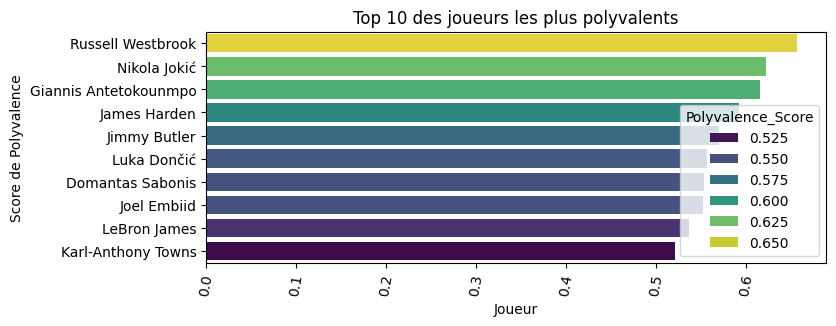

In [76]:
# Visualisation des résultats
plt.figure(figsize=(8,3))
sns.barplot(data=top_polyvalents, x='Polyvalence_Score', hue = 'Polyvalence_Score', y='Player', palette='viridis')
plt.xticks(rotation=80)
plt.xlabel('Joueur')
plt.ylabel('Score de Polyvalence')
plt.title('Top 10 des joueurs les plus polyvalents')
plt.show();

##### 2-4-2 Corrélation points/rebonds/pass

In [79]:
# Variables à corrélées
pts_trb_ass = ['PTS', 'TRB', 'AST']

# Matrice de corrélation
corr_pts_trb_ass = df_nba[pts_trb_ass].corr()
corr_pts_trb_ass

,PTS,TRB,AST
PTS,1.000000,0.627926,0.740902
TRB,0.627926,1.000000,0.399794
AST,0.740902,0.399794,1.000000


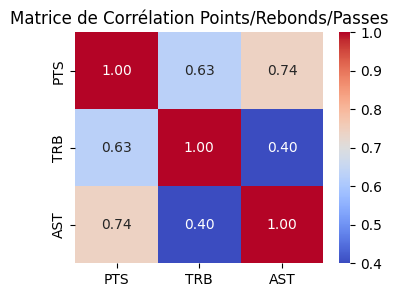

In [81]:
# Création d'une heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_pts_trb_ass, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation Points/Rebonds/Passes")
plt.show();

    ### Nous avons 63% de corrélation entre Points et Rebonds, 
    ### 74% de corrélation entre Points et Passes,
    ### 40% entre Rebonds et Passes

### 2-5 Equipes les plus offensives

##### 2-5-1 Top 5 des équipes les plus offensives

In [86]:
top_5_offensive_team = df_nba.groupby('Team')['PTS'].sum().sort_values( ascending = False).head(5)
top_5_offensive_team

Team
2TM    574.0
HOU    306.1
ORL    258.8
BRK    240.0
OKC    208.9
Name: PTS, dtype: float64

##### 2-5-2 Distribution des points par équipe

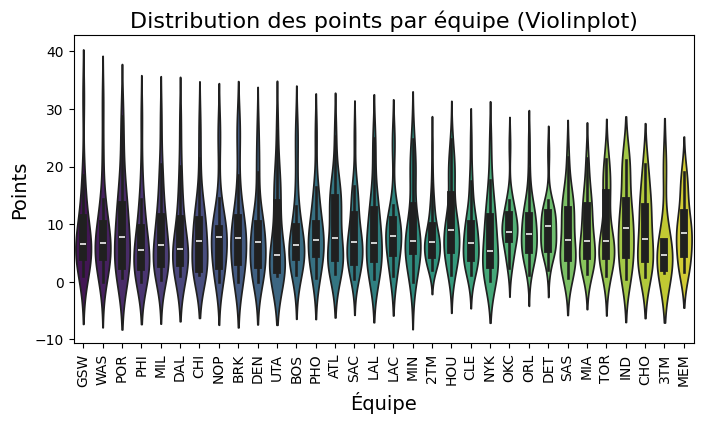

In [89]:
# Distribution des points par équipe
# Violinplot de la distribution des points par équipe
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_nba, x='Team', hue='Team',y='PTS', palette='viridis')

# Titres et labels
plt.title('Distribution des points par équipe (Violinplot)', fontsize=16)
plt.xlabel('Équipe', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.xticks(rotation=90) 
plt.show()

### 2-6 Radio points / Minutes

##### 2-6-1 Top 10 des joueurs les plus efficaces

In [95]:
# Sélection des stats pour un joueur efficace
stats_efficace = ['FG%', '3P%', '2P%', 'FT%', 'AST', 'STL', 'BLK'] 

# Création d'une copie de df_nba
df_nba_efficace = df_nba.copy()

# Remettre l'index "Player" en colonne
if "Player" not in df_nba_efficace:
    df_nba_efficace.reset_index(inplace = True)

# Verificatio,
# print(df_nba_efficace)

# Normalisation des valeurs entre 0 et 1
scaler_efficace = MinMaxScaler()
df_nba_efficace[stats_efficace] = scaler_efficace.fit_transform(df_nba_efficace[stats_efficace])

# Calcul d'un score de polyvalence (moyenne des stats normalisées)
df_nba_efficace['Efficace_Score'] = df_nba_efficace[stats_efficace].mean(axis=1)

# Trier les joueurs les plus polyvalents et éviter les doublons
top_10_efficace = df_nba_efficace.sort_values(by='Efficace_Score', ascending=False).drop_duplicates(subset=['Player']).head(10)

# Affichage avec suppression des lignes avec NANs
display(top_10_efficace[['Player', 'Efficace_Score', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'AST', 'STL', 'BLK']].dropna())

,Player,Efficace_Score,MP,FG%,3P%,2P%,FT%,AST,STL,BLK
85,Khyri Thomas,0.577919,30.6,0.485,0.333,0.590,1.000,0.427350,0.857143,0.352941
22,James Harden,0.575852,36.6,0.471,0.366,0.552,0.856,0.931624,0.619048,0.235294
133,LaMarcus Aldridge,0.566285,26.0,0.521,0.800,0.488,1.000,0.222222,0.285714,0.647059
10,Nikola Jokić,0.566047,34.6,0.566,0.388,0.606,0.868,0.709402,0.619048,0.205882
84,Chris Paul,0.555227,31.4,0.499,0.395,0.543,0.934,0.760684,0.666667,0.088235
361,Draymond Green,0.550357,31.5,0.447,0.270,0.535,0.795,0.760684,0.809524,0.235294
36,Jimmy Butler,0.548296,33.6,0.497,0.245,0.538,0.863,0.606838,1.000000,0.088235
9,Kyrie Irving,0.539481,34.9,0.506,0.402,0.561,0.922,0.512821,0.666667,0.205882
157,Myles Turner,0.530577,31.0,0.477,0.335,0.606,0.782,0.085470,0.428571,1.000000


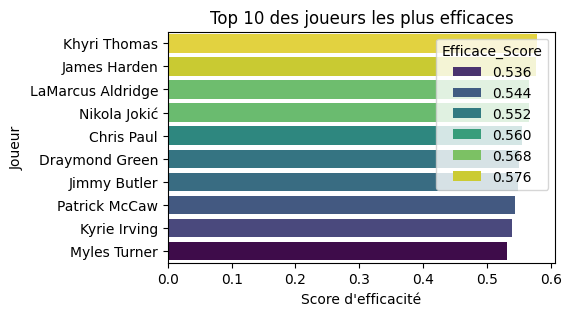

In [97]:
# Visualisation du Top 10 efficace
plt.figure(figsize=(5,3))
sns.barplot(data=top_10_efficace, x="Efficace_Score", hue = "Efficace_Score", y="Player", palette="viridis")
plt.xlabel("Score d'efficacité")
plt.ylabel("Joueur")
plt.title("Top 10 des joueurs les plus efficaces")
plt.show();

##### 2-6-2 Corrélation minutes / points

In [100]:
# Variables à corréler: MP et PTS
mp_pts_var = ['MP', 'PTS']

# Matrice
mp_pts_var_matrix = df_nba[mp_pts_var].corr()
mp_pts_var_matrix

,MP,PTS
MP,1.000000,0.879928
PTS,0.879928,1.000000


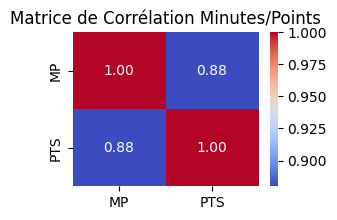

Nous avons une forte corrélation entre les minutes jouées et le nombre de points (88%)


In [102]:
# Heatmap minutes / points
plt.figure(figsize=(3, 2))
sns.heatmap(mp_pts_var_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation Minutes/Points")
plt.show();

print("Nous avons une forte corrélation entre les minutes jouées et le nombre de points (88%)")

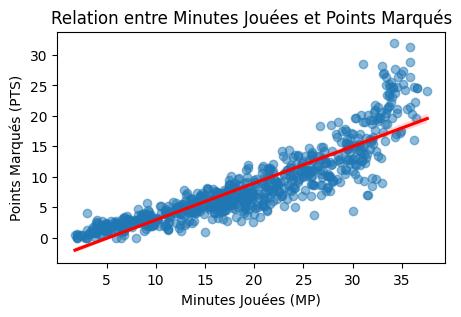

In [104]:
# Graphiphe Points marqués / Minutes joués
plt.figure(figsize=(5,3))

# Scatter plot avec régression
sns.regplot(data=df_nba, x="MP", y="PTS", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Personnalisation du graphique
plt.xlabel("Minutes Jouées (MP)")
plt.ylabel("Points Marqués (PTS)")
plt.title("Relation entre Minutes Jouées et Points Marqués")
plt.show()

### 2-7 Joueurs sous-utilisés

##### 2-7-1 Joueurs performants avec peu de minutes jouées

In [108]:
"""
On pars sur les joueurs eficaces (df_nba_efficace) et 
on filtre ceux qui ont moins de minutes jouées que la médiane
"""
# Calcul de la median
median_minutes = df_nba_efficace['MP'].median()

# Filtre des joueurs ayant moins de minutes jouées que la médiane
efficace_low_minutes = df_nba_efficace[df_nba_efficace['MP'] < median_minutes]

# Trie des joueurs les plus performants parmi ceux qui jouent peu
top_10_low_minutes = efficace_low_minutes.sort_values(by='Efficace_Score', ascending=False).dropna()

# Affichage des
display(top_10_low_minutes[['Player', 'Efficace_Score', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'AST', 'STL', 'BLK']].head(10))

,Player,Efficace_Score,MP,FG%,3P%,2P%,FT%,AST,STL,BLK
424,Drew Eubanks,0.475706,14.0,0.566,1.000,0.562,0.726,0.068376,0.142857,0.264706
638,Chris Silva,0.475630,7.5,0.692,1.000,0.667,0.733,0.042735,0.047619,0.147059
336,Louis King,0.467956,14.2,0.500,0.364,0.565,1.000,0.128205,0.571429,0.147059
618,Gary Payton II,0.461668,4.0,0.769,0.500,0.889,0.750,0.008547,0.285714,0.029412
665,Rodions Kurucs,0.461299,6.8,0.625,0.750,0.500,1.000,0.068376,0.285714,0.000000
535,Darius Miller,0.460019,10.9,0.458,0.405,0.833,1.000,0.102564,0.333333,0.088235
637,Chris Silva,0.451065,6.1,0.625,1.000,0.600,0.733,0.034188,0.047619,0.117647
299,Robert Williams,0.446887,18.9,0.721,0.000,0.727,0.616,0.153846,0.380952,0.529412
374,Gorgui Dieng,0.442933,16.9,0.519,0.479,0.550,0.884,0.111111,0.380952,0.176471
448,Rajon Rondo,0.434490,17.1,0.442,0.404,0.468,0.941,0.376068,0.380952,0.029412


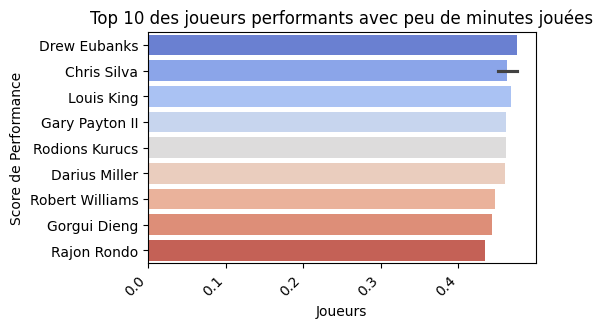

In [110]:
# Visualisation du Top 10 des joueurs éfficaces avec peu de minutes jouées
plt.figure(figsize=(5,3))

# Affichage du top en barplot
sns.barplot(data=top_10_low_minutes.head(10), x='Efficace_Score', y='Player', hue='Player', palette='coolwarm')

# Personnalisation du graphique
plt.xticks(rotation=45, ha='right')
plt.xlabel("Joueurs")
plt.ylabel("Score de Performance")
plt.title("Top 10 des joueurs performants avec peu de minutes jouées")
plt.show();

##### 2-7-2 Répartition par équipe des joueurs performants avec peu de minutes jouées

In [113]:
# Nous allons faire un groupby sur la liste des 10 joueurs les moins utilisés
# Size() compte les valeur
low_min_play_by_team = top_10_low_minutes.groupby('Team').size().reset_index(name='Nb_Joueurs_Sous_Utilisés')
low_min_play_by_team.sort_values(by = 'Nb_Joueurs_Sous_Utilisés', ascending = False).head(10)

,Team,Nb_Joueurs_Sous_Utilisés
0,2TM,39
3,BOS,13
7,CLE,12
8,DAL,12
24,PHI,12
29,TOR,11
25,PHO,11
20,NOP,10
30,UTA,10
27,SAC,10


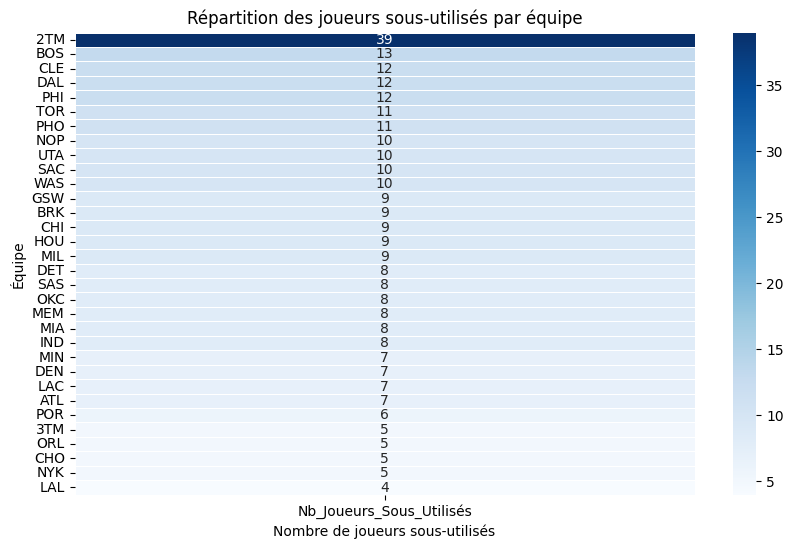

In [115]:
# Visualisation

# Création d'un tableau croisé des joueurs sous-utilisés par équipe
pivot_table = low_min_play_by_team.pivot_table(index="Team", values="Nb_Joueurs_Sous_Utilisés")

# Trie par order
pivot_table_trier = pivot_table.sort_values(by = 'Nb_Joueurs_Sous_Utilisés', ascending = False)

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_trier, annot=True, cmap="Blues", linewidths=0.5)

# Ajout de labels
plt.title("Répartition des joueurs sous-utilisés par équipe")
plt.xlabel("Nombre de joueurs sous-utilisés")
plt.ylabel("Équipe")
plt.show();

### 2-8 Prédiction des points par match

##### 2-8-1 Traitement des NANs

In [119]:
# Vérification des valeurs null
print(df_nba_efficace.isna().sum())
""" Nous avons: 
    2 NANs pour FG%
    35 NANs pour 3P%
    29 NANs pour FT%
"""

Player             0
Rk                 0
Age                0
Team               0
Pos                0
G                  0
GS                 0
MP                 0
FG                 0
FGA                0
FG%                2
3P                 0
3PA                0
3P%               35
2P                 0
2PA                0
2P%                6
eFG%               2
FT                 0
FTA                0
FT%               29
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
Awards             0
Efficace_Score     0
dtype: int64


' Nous avons: \n    2 NANs pour FG%\n    35 NANs pour 3P%\n    29 NANs pour FT%\n'

In [121]:
# Traitement des NANs

# Création d'une copie du data frame
df_nba_pred = df_nba_efficace.copy() # on peut aussi prendre df_nba

# Remplaçons par la médiane 
df_nba_pred.fillna(df_nba_pred.median(), inplace=True)
df_nba_pred.isna().sum()

C:\Users\diakh\AppData\Local\Temp\ipykernel_2372\4242615791.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nba_pred.fillna(df_nba_pred.median(), inplace=True)
C:\Users\diakh\AppData\Local\Temp\ipykernel_2372\4242615791.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_nba_pred.fillna(df_nba_pred.median(), inplace=True)


Player            0
Rk                0
Age               0
Team              0
Pos               0
G                 0
GS                0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Awards            0
Efficace_Score    0
dtype: int64

##### 2-8-2 Préparation des données (séparation train / test)

###### a - Encodage des variables catégorielles

In [125]:
# Dans notre cas nous allons encoder la variable 'Pos' car la position du joueur influe sur le nbre de pts

# Affichage des variables de df_nba_pred
print(df_nba_pred.columns)
print()
# Affichage des types de position
print("Liste des positions:\n",df_nba_pred['Pos'].value_counts())

Index(['Player', 'Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Efficace_Score'],
      dtype='object')

Liste des positions:
 SG    160
C     143
PF    141
SF    131
PG    130
Name: Pos, dtype: int64


In [127]:
# Définition de la fonction qui permet l'encodage
def replace_pos(x):
    if x == 'SG':
        return 1
    elif x == 'C': 
        return 2
    elif x == 'PF':
        return 3
    elif x == 'SF':
        return 4
    else:
        return 5 

In [129]:
# Application de l'encodage
df_nba_pred_encode = df_nba_pred.copy()
df_nba_pred_encode['Pos'] = df_nba_pred['Pos'].apply(replace_pos)

# Verification
df_nba_pred_encode.head(2)

,Player,Rk,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Efficace_Score
0,Stephen Curry,1,32,GSW,5,63,63,34.2,10.4,21.7,...,5.0,5.5,0.495726,0.571429,0.029412,3.4,1.9,32.0,"MVP-3,AS,NBA1",0.497795
1,Bradley Beal,2,27,WAS,1,60,60,35.8,11.2,23.0,...,3.5,4.7,0.376068,0.571429,0.117647,3.1,2.3,31.3,"AS,NBA3",0.474735


In [131]:
# Séléction de la variable cible et des variables explicatives
var_target = 'PTS'
var_features = ['Rk', 'MP', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'TOV', 'Pos']

###### b - Séparation train / test

In [134]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = df_nba_pred_encode[var_features]
y = df_nba_pred_encode[var_target]

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### c - Choix du modèle et Evaluation

Model 1 : Regréssion Linéaire

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

In [140]:
# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"LinearRegression - MSE: {mse:.3f}")
print(f"LinearRegression - RMSE: {rmse:.3f}")
print(f"LinearRegression - R^2 Score: {r2:.3f}")

LinearRegression - MSE: 0.662
LinearRegression - RMSE: 0.814
LinearRegression - R^2 Score: 0.983


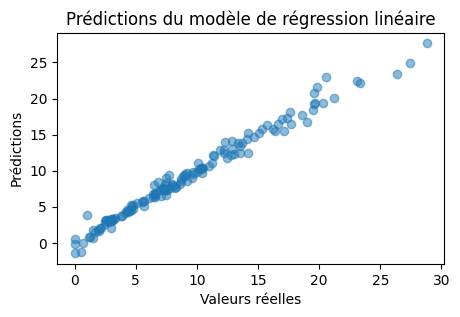

In [142]:
# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions du modèle de régression linéaire")
plt.show()

Model 2 : Random Forest

In [145]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
model_rf = RandomForestRegressor(random_state=42)

# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)

In [147]:
# Évaluer les performances du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.3f}")
print(f"Random Forest - RMSE: {rmse_rf:.3f}")
print(f"Random Forest - R^2 Score: {r2_rf:.3f}")

Random Forest - MSE: 0.384
Random Forest - RMSE: 0.814
Random Forest - R^2 Score: 0.990


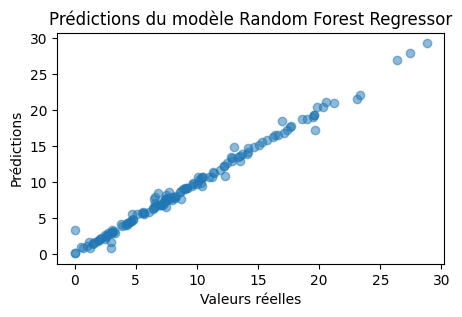

In [149]:
# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions du modèle Random Forest Regressor")
plt.show()

Model 3 : Arbre de décision

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de l'arbre de décision pour la régression
model_dt = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle sur les données d'entraînement
model_dt.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_dt = model_dt.predict(X_test)

In [154]:
# Évaluer les performances du modèle
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt:.3f}")
print(f"Decision Tree - RMSE: {rmse_dt:.3f}")
print(f"Decision Tree - R^2 Score: {r2_dt:.3f}")

Decision Tree - MSE: 0.738
Decision Tree - RMSE: 0.814
Decision Tree - R^2 Score: 0.981


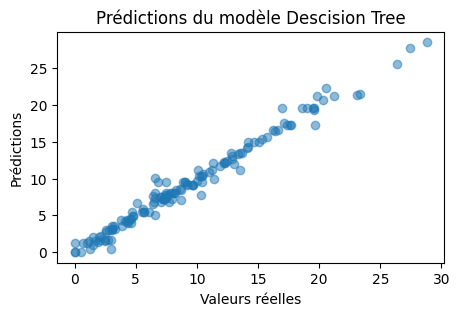

In [156]:
# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions du modèle Descision Tree")
plt.show()

Comparaison des modèles

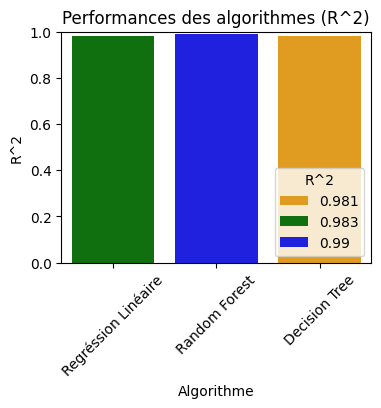

Les modèles ont des performances élevées et similaires
Cependant nous allons choisir le Random Forest qui a un score R² de 99%


In [196]:
# Création d'un Data Frame des modèles et métrique
resultats = pd.DataFrame({
        'Algorithme': ['Regréssion Linéaire', 'Random Forest', 'Decision Tree'],
        'R^2' : [0.983, 0.990 ,0.981]})

# Créer le graphique
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x='Algorithme', y='R^2', hue='R^2', data=resultats, palette=['orange', 'green', 'blue'])
ax.set_title('Performances des algorithmes (R^2)')
ax.set_xlabel('Algorithme')
ax.set_ylabel('R^2')
plt.ylim(0, 1)  # Ajuster les limites de l'axe y pour une meilleure visualisation
plt.legend(title='R^2', loc='lower right')  # Ajouter une légende pour les essais
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()
print('Les modèles ont des performances élevées et similaires\nCependant nous allons choisir le Random Forest qui a un score R² de 99%')

###### d - Prédiction

In [200]:
# Prédire les valeurs sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)

# Création de df_predictions qui est une copie de X_test
df_predictions = X_test.copy() 
df_predictions["PTS_Prediction"] = y_pred  
df_predictions["PTS_Réel"] = y_test 

print(df_predictions[["PTS_Réel", "PTS_Prediction"]].head(10))  



     PTS_Réel  PTS_Prediction
478       5.1        5.590819
81       16.6       16.408969
77       13.0       12.291656
208      10.5       10.419558
319       7.6        7.311239
326       7.5        6.694756
248       9.2        8.572628
324       7.5        8.252673
620       1.2        0.825196
120      14.1       14.368559


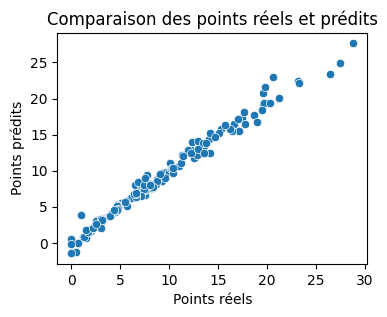

In [218]:
# Représentation graphique
plt.figure(figsize=(4,3))
sns.scatterplot(x=df_predictions["PTS_Réel"], y=df_predictions["PTS_Prediction"])
plt.xlabel("Points réels")
plt.ylabel("Points prédits")
plt.title("Comparaison des points réels et prédits")
plt.show()

In [294]:
df_predictions[['Rk', 'MP', 'Pos', 'PTS_Réel','PTS_Prediction']].sort_values(by = 'PTS_Prediction', ascending = True).head(10)

,Rk,MP,Pos,PTS_Réel,PTS_Prediction
701,702,3.0,2,0.0,-1.418276
355,356,1.8,4,0.5,-1.277445
700,701,2.0,5,0.0,-0.105992
692,693,4.4,4,0.7,-0.015370
356,357,8.0,4,0.0,0.527317
672,673,9.0,3,1.5,0.654183
620,621,4.1,3,1.2,0.825196
674,675,3.7,1,1.3,0.888543
660,661,5.3,4,1.7,1.525049
647,648,10.8,4,2.0,1.595940


In [268]:
df_predictions.head()

,Rk,MP,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,TOV,Pos,PTS_Prediction,PTS_Réel
478,479,15.5,5.0,0.379,2.1,0.226,3.0,0.485,1.1,0.703,0.8,3,5.590819,5.1
81,82,34.3,14.0,0.406,10.2,0.391,3.8,0.446,1.5,0.846,1.8,1,16.408969,16.6
77,78,29.5,10.8,0.448,5.9,0.463,4.8,0.429,0.9,0.714,1.2,4,12.291656,13.0
208,209,30.3,8.7,0.413,6.3,0.382,2.4,0.494,1.2,0.788,0.8,1,10.419558,10.5
319,320,27.7,5.3,0.614,0.1,0.000,5.3,0.620,2.3,0.444,1.3,2,7.311239,7.6


In [385]:
# Sauvegarde de la base de données
df_nba.to_csv('web_scrap_nba_2021_per_game.csv')
df_predictions.to_csv('web_scrap_nba_2021_prediction.csv')